# Lillian Jiang - Proj 5 
# Stellar Properties from B,V images - HR Diagram

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines

In [2]:
cluster = np.loadtxt("cluster.txt")
cluster_b = cluster[:,1]
cluster_v = cluster[:,2]
field = np.loadtxt("field.txt")
field_b = field[:,1]
field_v = field[:,2]

# constants in cgs units

In [3]:
#The Planck Constant
h = 6.626 * 10**(-27)  #erg*sec

#The Boltzmann Constant
k = 1.381 * 10**(-16)  #erg/K

#Speed of light
c = 2.998 * 10**(10)   #cm/sec

# enter temp, lambda

In [4]:
temp = np.arange(2000, 50000, 200)         
#in nm unit
lambdaRange_nm = np.array([440,550])
#convert into cm
lambdaRange_cm = lambdaRange_nm*(1e-7)

Temp, WaveRange = np.meshgrid(temp,lambdaRange_cm)   

In [5]:
calc_top = 2*h*c**2
expo = (h*c)/(WaveRange*k*Temp)
calc_bot = (WaveRange**5)*(np.exp(expo)-1)
planck_result = calc_top/calc_bot
planck_bv = planck_result[0]/planck_result[1] 

# Temp

We have two assumptions:
1. Stars are thmeral radiators, which means we can calculate the star temperature from planck function. Each temperature has a unique b/v ratio assoicated to it. We find the corresponding temperature with star's b/v through planck function.
2. The temperature is from color temp.

In [6]:
cluster_bv = cluster_b/cluster_v
temp_cluster = np.interp(cluster_bv,planck_bv,temp)

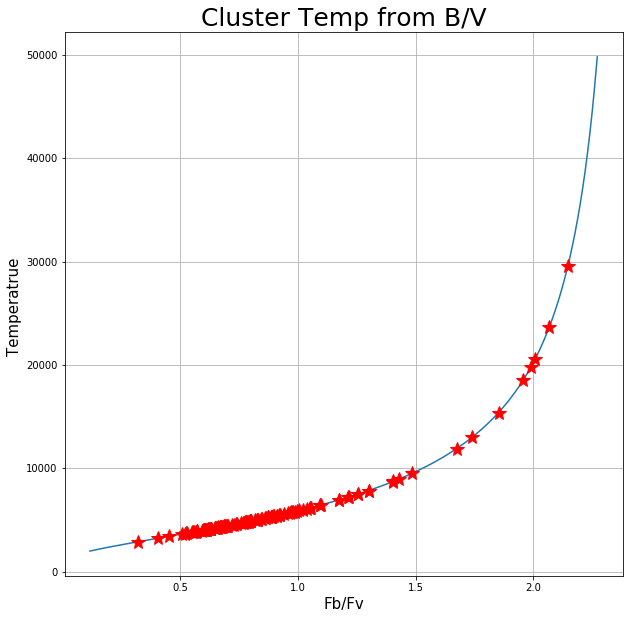

In [7]:
# plot Planck function as a function of wave for a range of temp
plt.figure(figsize=(10,10))
plt.plot(planck_bv,temp,'-', markersize = 15)
plt.plot(cluster_bv,temp_cluster,'r*',markersize = 15)
plt.ylabel("Temperatrue ", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.title('Cluster Temp from B/V', size = 25)
plt.grid()


This is a scatterplot for planck function and the assoicated temperature for clusters b/v.

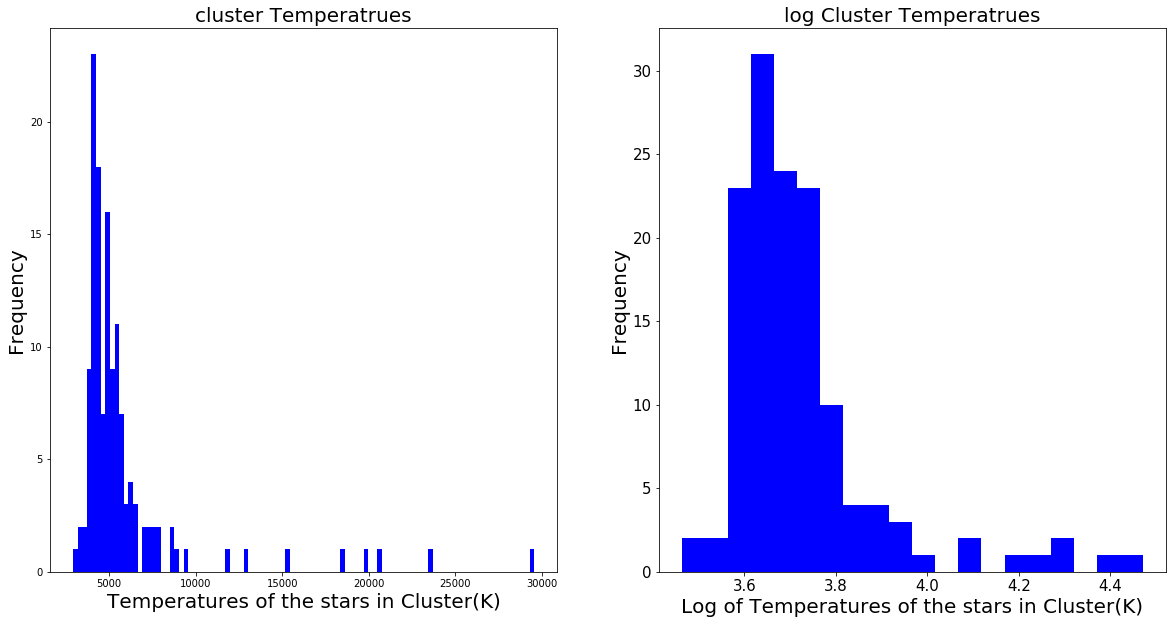

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
bins = 100
plt.hist(temp_cluster,bins, facecolor='b')
plt.title('cluster Temperatrues',size=20)
plt.xlabel('Temperatures of the stars in Cluster(K)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.subplot(1,2,2)
bins = 20
plt.hist(np.log10(temp_cluster),bins, facecolor='b')
plt.title('log Cluster Temperatrues',size=20)
plt.xlabel('Log of Temperatures of the stars in Cluster(K)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.show()

<div class="alert alert-block alert-success">
    
   - Most stars have temperature around 5000k, and have silimar or cooler temperature as the Sun which is around 6000k. The hottest star in the cluster is near 30000k. The distrubution is very skew to right.

# Radius


- We assume the stars in cluster have the same distance from us.
- We also assume that the star associated with b/v =1 is the sun, which it is not necessarily true in reality.

- First, we normalize all stars at b/v = 1, then create a set of imageary stars with radii = the sun. The graph is use to compare the brightess between each actual star and its imaginary counterpart if it were the size as the star with b/v = 1. The brightness ratio can easily turned into a ratio of radii because for a given cluster star, it is the ratip between the real and imaginary stars corresponding to the ratio of surface areas.

- One thing keep in mind when calcalate the ratio from log graph: if the difference in log V brightness is X, then the corresponding brightness ratip will be 10^x.




In [9]:
#find the value assoicated with b/v = 1 in planck function
minvalue = 1
index = 0
for x in range(len(planck_bv)):
    if (abs(1 - planck_bv[x]) < minvalue):
        minvalue = 1 - planck_bv[x]
        index = x
planck_v = planck_result[1]
planck1 = planck_v[index]
print("The index is", index)
print("The nearest planck value assoicated with b/v = 1 is", planck1)

The index is 20
The nearest planck value assoicated with b/v = 1 is 306678278611852.4


In [10]:
#find the value assoicated with b/v = 1 in cluster 
minvalue = 1
index = 0
for x in range(len(cluster_bv)):
    if (abs(1 - cluster_bv[x]) < minvalue):
        minvalue = 1 - cluster_bv[x]
        index = x
cluster1 = cluster_v[index]
print("The nearest cluster V counts assoicated with b/v = 1 is" ,cluster1)

The nearest cluster V counts assoicated with b/v = 1 is 3600.0


In [11]:
# In order to find the residual between cluster v counts and planck v counts, we create a set of imaginary stars.
V_imaginary_stars = np.interp(cluster_bv,planck_bv,np.log10(planck_result[1]/planck1))
V_cluster_stars= np.log10(cluster_v/cluster1)

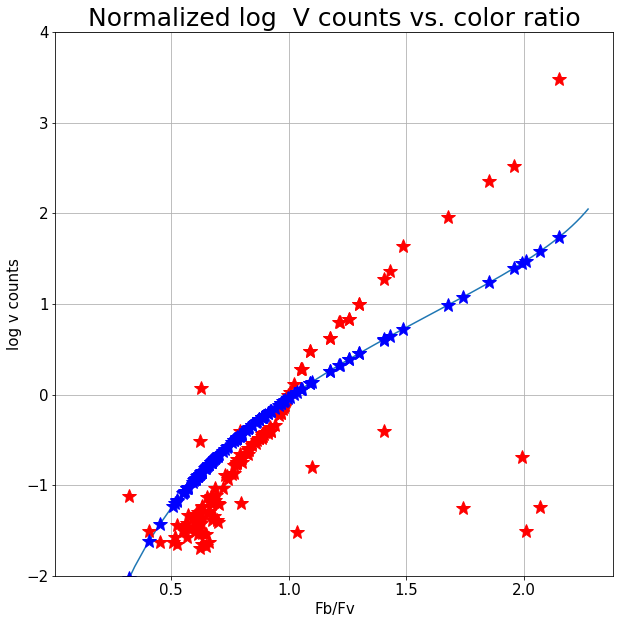

In [12]:
#Normalization with log
plt.figure(figsize=(10,10))
plt.plot(planck_bv, np.log10(planck_result[1]/planck1),'-', markersize = 15)
plt.plot(cluster_bv, V_cluster_stars,'r*', markersize = 15)
plt.plot(cluster_bv, V_imaginary_stars,'b*', markersize = 15)

plt.ylabel("log v counts", size=15)
plt.xlabel("Fb/Fv",size=15)
plt.ylim(-2,4)
plt.title('Normalized log  V counts vs. color ratio', size = 25)
plt.grid()

The blue is set of imaginary stars. 
The red is cluster stars after normalization at b/v = 1.
The bluer the stars are, the bigger the gaps are.

### Transform brightness(luminosity ratio) into radius by equation: $L = 4 \pi R^2 \sigma T^4$

$\frac{L_1}{L_2} = (\frac{R_1}{R_2})^2 * \frac{4 \pi \sigma T^4}{4 \pi \sigma T^4}$ 

$\frac{L_1}{L_2} = (\frac{R_1}{R_2})^2 $

$\frac{R_1}{R_2} = (\frac{L_1}{L_2})^{0.5} $

Units: Radius(m), Temp(K), Luminosity($m^2 K^4$)

In [13]:
diff = V_cluster_stars - V_imaginary_stars
intensity_ratio = 10**diff
radius_ratio = intensity_ratio**0.5

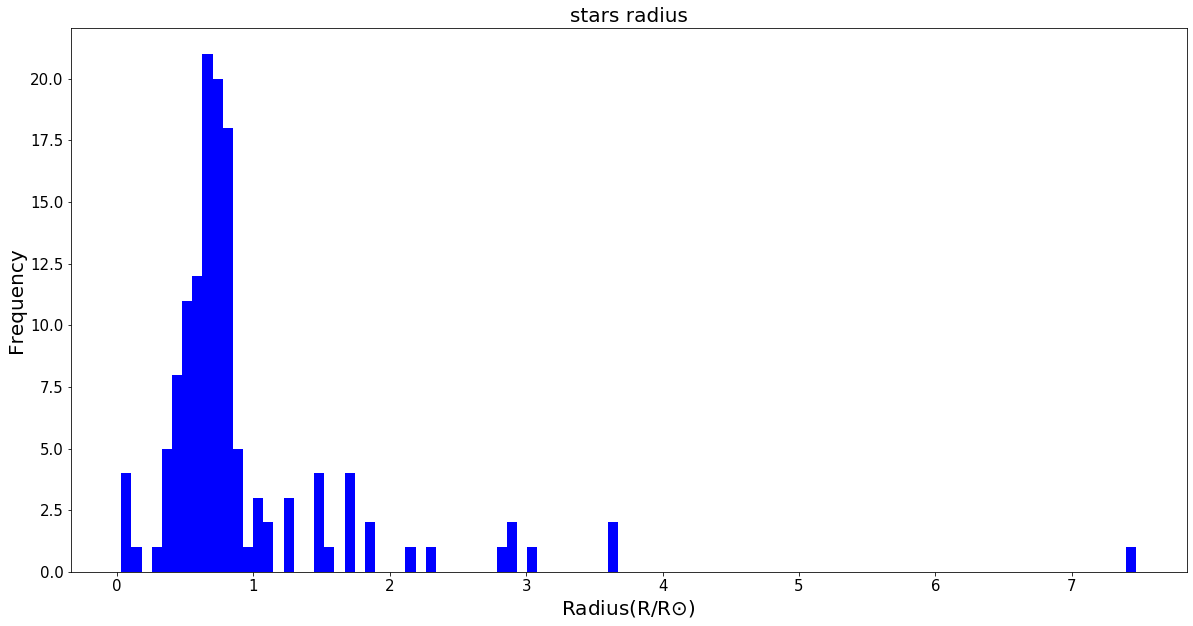

In [14]:
plt.figure(figsize=(20,10))

bins = 100
plt.hist(radius_ratio,bins, facecolor='b')
plt.title('stars radius',size=20)
plt.xlabel('Radius(R/R$\odot$)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.show()

<div class="alert alert-block alert-success">
    
   - Most stars are smaller than the sun. 
   - The largest star is 7 times larger than the sun.
   - The smallest star is 0.05 of the sun. 

# Luminosity

From the temperature and radii of the cluster stars, we can now calculate the bolometric luminosity of each stars:

## $L = 4 \pi R^2 \sigma T^4$
$\frac{L}{L \odot} = (\frac{R}{R \odot})^2 * \frac{\sigma T^4}{\sigma T\odot^4}$

Units: Radius(m), Temp(K), Luminosity($m^2 K^4$)

In [15]:
unit_temp_ratio = temp_cluster**4/temp_cluster[20]**4
lumin_ratio = radius_ratio**2 * unit_temp_ratio

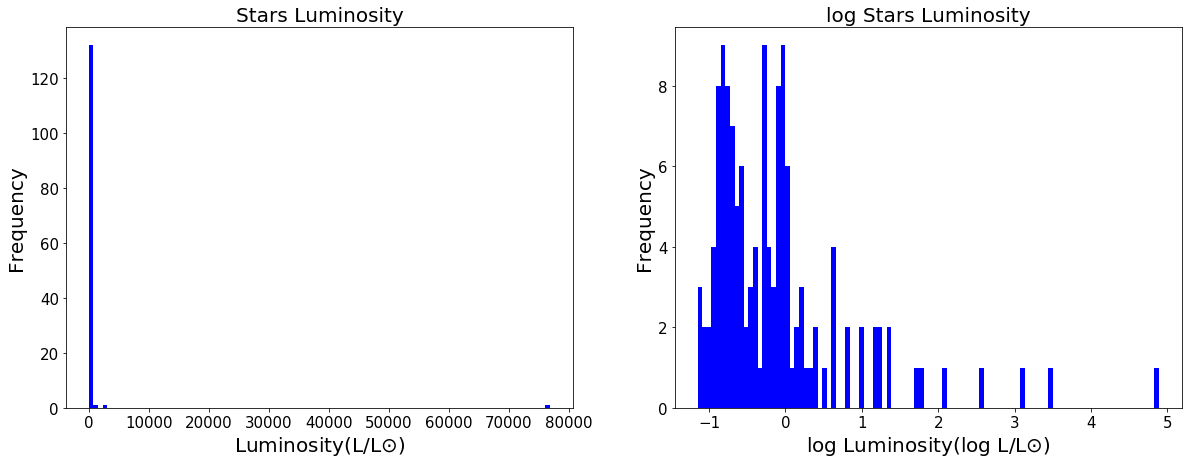

In [16]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
bins = 100
plt.hist(lumin_ratio,bins, facecolor='b')
plt.title('Stars Luminosity',size=20)
plt.xlabel('Luminosity(L/L$\odot$)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.subplot(1,2,2)
bins = 100
plt.hist(np.log10(lumin_ratio),bins, facecolor='b')
plt.title('log Stars Luminosity',size=20)
plt.xlabel('log Luminosity(log L/L$\odot$)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.show()

<div class="alert alert-block alert-success">
    
   - Most stars are dimmer or as bright as the sun. 
   - The brightest star is 100000 times brighter than the sun.
   - The dimmest star is 0.1 times dimmer than the sun.

# Overall three histograms

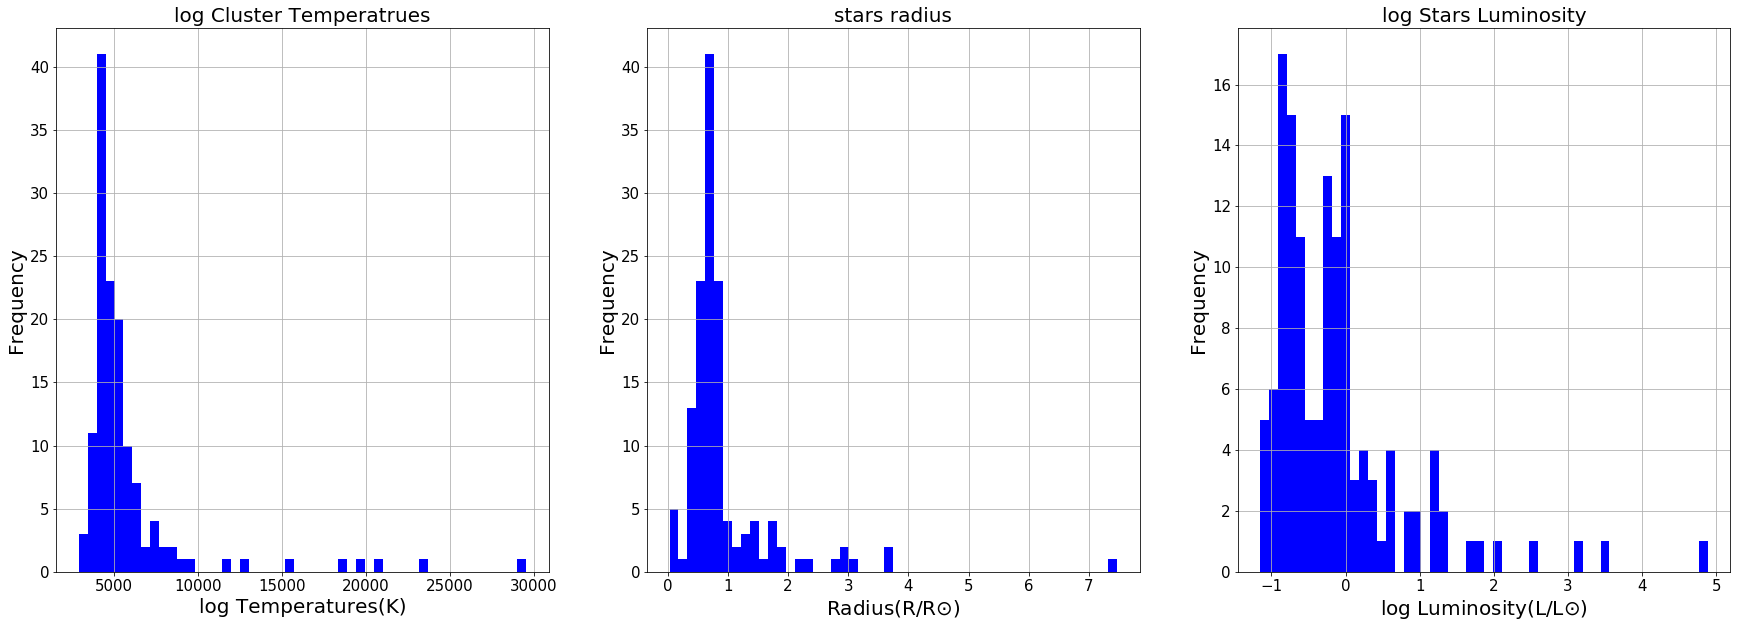

In [17]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
bins = 50
plt.hist(temp_cluster,bins, facecolor='b')
plt.title('log Cluster Temperatrues',size=20)
plt.xlabel('log Temperatures(K)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.grid()

plt.subplot(1,3,2)
bins = 50
plt.hist(radius_ratio,bins, facecolor='b')
plt.title('stars radius',size=20)
plt.xlabel('Radius(R/R$\odot$)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.grid()

plt.subplot(1,3,3)
bins = 50
plt.hist(np.log10(lumin_ratio),bins, facecolor='b')
plt.title('log Stars Luminosity',size=20)
plt.xlabel('log Luminosity(L/L$\odot$)',size=20)
plt.ylabel('Frequency',size=20)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.grid()
#plt.gca().invert_yaxis()

plt.show()

Summary: 
1. Temp histogram: Most stars have same temperatrue or cooler than sun. The hottest star in the cluster is near 30000k. The dimmest star is near 2000k.

2. Radius: Most stars are smaller than the sun. The biggest star is 7 times larger than the sun. The smallest is 0.01 times smaller than the sun.

3. Luminosity: Most stars have same brightness or dimmer than the sun. The brightest star in the cluster is 100000 times brighter than sun. The dimmest star is 0.1 dimmer than the sun.
                

# Stellar Property Reviewed for RGC224!

HR Digram for RGC224 - plot luminosity over temperature 
- $ L = 4 \pi R^2 \sigma T^4$ 
- $ \log L = \log (4 \pi R^2 \sigma T^4)$ 

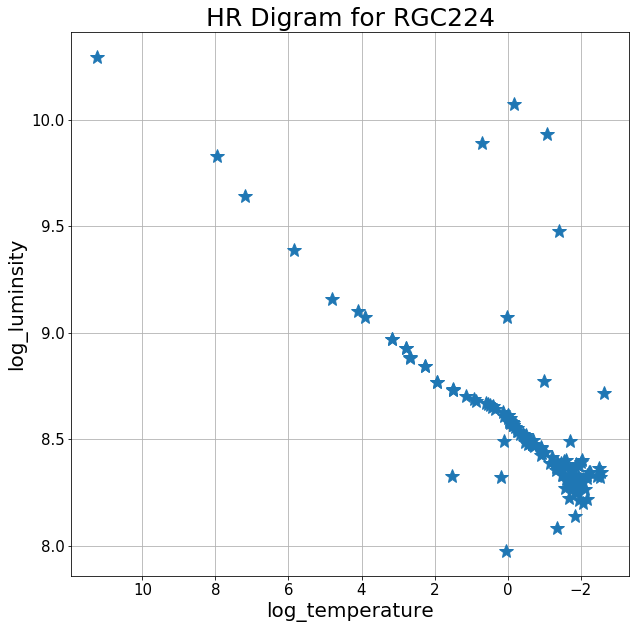

In [18]:
plt.figure(figsize=(10,10))

plt.plot(np.log(lumin_ratio),np.log(temp_cluster),'*', markersize = 15)
plt.ylabel("log_luminsity", size=20)
plt.xlabel("log_temperature",size=20)
plt.title('HR Digram for RGC224', size = 25)
plt.gca().invert_xaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-success">
    
- With the decrease in temperature of stars in cluster RGC224, the luminosity also decrease. They have a negative relationship. The stars are seen as main sequence.

- There are some abnormal stars in the temperature range of 100k to 0.01k. They do not the pattern. 
- Also there is a very bright hot star in the cluster. That might be a supergiant. 

# Field Observation

In [19]:
field_bv = field_b/field_v
temp_field = np.interp(field_bv,planck_bv,temp)

In [20]:
desired = 1
index = (np.abs(field_bv-desired)).argmin()
field1 = field_bv[index]

In [21]:
V_imaginary_stars_f = np.interp(field_bv,planck_bv,np.log10(planck_result[1]/planck1))
V_field_stars= np.log10(field_v/field1)

diff_f = V_field_stars - V_imaginary_stars_f
intensity_ratio_f = 10**diff_f
radius_ratio_f = intensity_ratio_f**0.5

unit_temp_ratio_f = temp_field**4/temp_field[index]**4
field_lumin_ratio = radius_ratio_f**2 * unit_temp_ratio_f

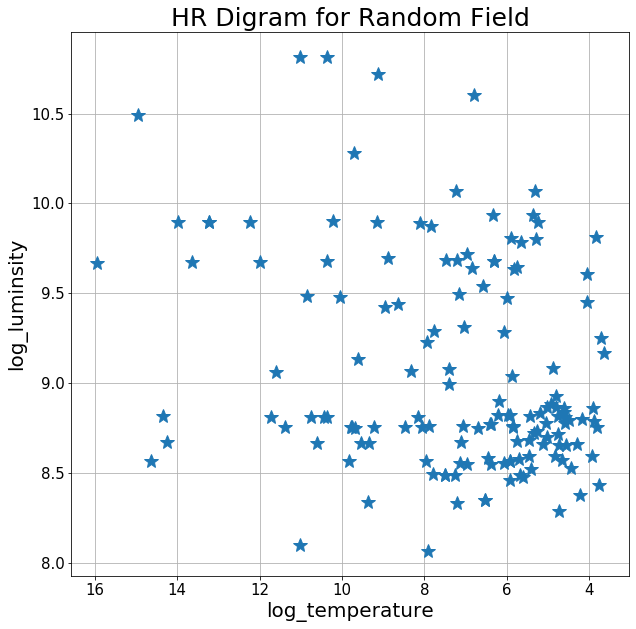

In [22]:
plt.figure(figsize=(10,10))

plt.plot(np.log(field_lumin_ratio),np.log(temp_field),'*', markersize = 15)
plt.ylabel("log_luminsity", size=20)
plt.xlabel("log_temperature",size=20)
plt.title('HR Digram for Random Field', size = 25)
plt.gca().invert_xaxis()
plt.grid()

plt.show()

<div class="alert alert-block alert-success">

- The stars in the random field do not have relationship between luminosity and temperature. 
- We can tell there are two groups of stars, one is around log lumin = 9.7,  another is around log lumin = 8.8.
- Most stars have log temperature lower than 10.